# Učitavanje podataka

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

In [3]:
podaci_train=pd.read_csv('/content/drive/MyDrive/Umjetna inteligencija/Projekt/train.csv')
podaci_test=pd.read_csv('/content/drive/MyDrive/Umjetna inteligencija/Projekt/test.csv')

In [4]:
podaci_train.shape

(891, 12)

In [5]:
#podaci_test

In [6]:
#def spajanje_podataka(train_data, test_data):
#  return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

#def razdvajanje_podataka(svi_podaci):
#  return svi_podaci.loc[:890], svi_podaci.loc[891:].drop(['Survived'], axis=1)

In [7]:
#podaci=spajanje_podataka(podaci_train, podaci_test)

In [8]:
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Podaci o Dataset-u
- **PassengerId**: Jedinstveni Id svakog putnika
- **Survived**: Binarna vrijednost preživljavanja (0 = Ne, 1 = Da)
- **Pclass**: Razred karte svakog putnika (1 = 1. Razred, 2 = 2. Razred, 3 = 3. Razred)
- **Name**: Ime
- **Sex**: Spol svakog putnika
- **Age**: Dob svakog putnika u godinama
- **SibSp**: Broj rodbine ili supružnika na Titaniku
- **Parch**: Broj roditelja ili djece na Titaniku
- **Ticket**: Broj karte
- **Fare**: Cijena karte
- **Cabin**: Broj kabine putnika
- **Embarked**: Luka ukrcaja (C = Cherbourg, Q = Queenstown, S = Southampton)

<h3>Informacije o Dataset-u</h3>

In [9]:
podaci_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Broj podataka koji nedostaje u Dataset-u</h3>

In [10]:
print("Broj podataka koji nedostaju")
print(30 * "-")
print(podaci_train.isna().sum())
print(30 * "-")
print("Ukupan broj podataka koji nedostaju:", podaci_train.isna().sum().sum())
print(30 * "-")

Broj podataka koji nedostaju
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Ukupan broj podataka koji nedostaju: 866
------------------------------


# Eksplorativna analiza podataka (Exploratory Data Analysis - EDA)

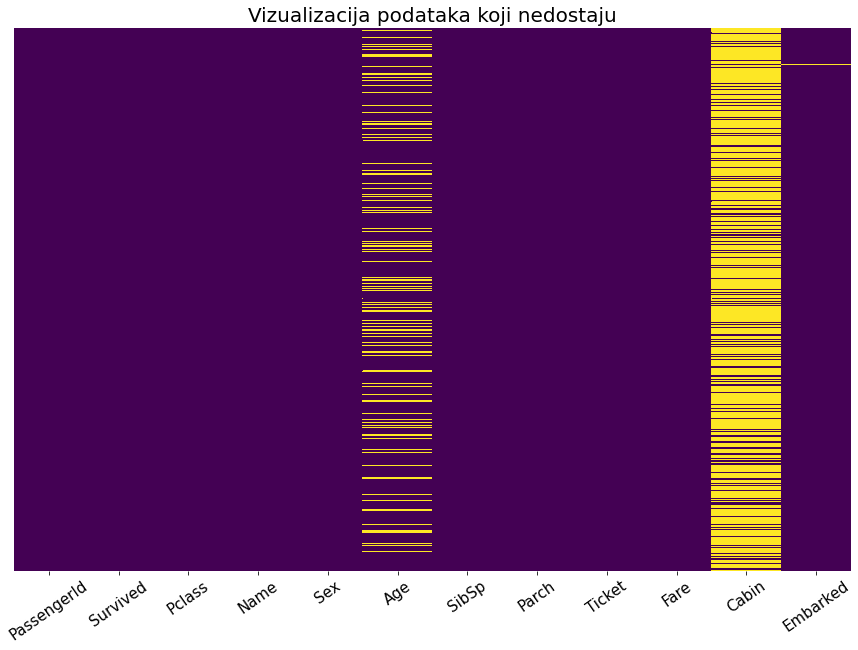

In [11]:
plt.figure(figsize = (15, 10))
sns.heatmap(podaci_train.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Vizualizacija podataka koji nedostaju", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

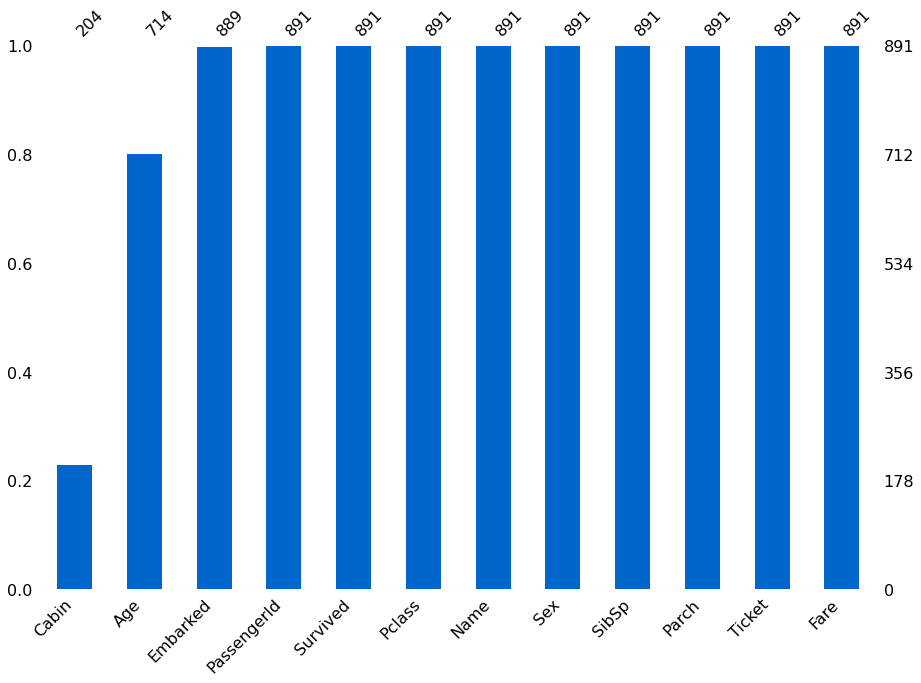

In [12]:
msno.bar(podaci_train, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

In [13]:
print("Postotak podataka koji nedostaje u Cabin field-u =", (podaci_train['Cabin'].isna().sum() / len(podaci_train['Cabin']) * 100), "%")
print("Postotak podataka koji nedostaje u Age field-u =", (podaci_train['Age'].isna().sum() / len(podaci_train['Age']) * 100), "%")
print("Postotak podataka koji nedostaje u Embarked field-u =", (podaci_train['Embarked'].isna().sum() / len(podaci_train['Embarked']) * 100), "%")

Postotak podataka koji nedostaje u Cabin field-u = 77.10437710437711 %
Postotak podataka koji nedostaje u Age field-u = 19.865319865319865 %
Postotak podataka koji nedostaje u Embarked field-u = 0.22446689113355783 %


Primjetimo kako je u stupcu `Cabin` visok postotak podataka koji nedostaje, pa bi bilo bolje ispustiti cijeli stupac nego popunjavati vrijednosti koje nedostaju. <br>
Po pitanju stupaca `Age` i `Embarked` nedostaje manjina podataka, te njih možemo dopuniti makar približno odgovarajućim vrijednostima.

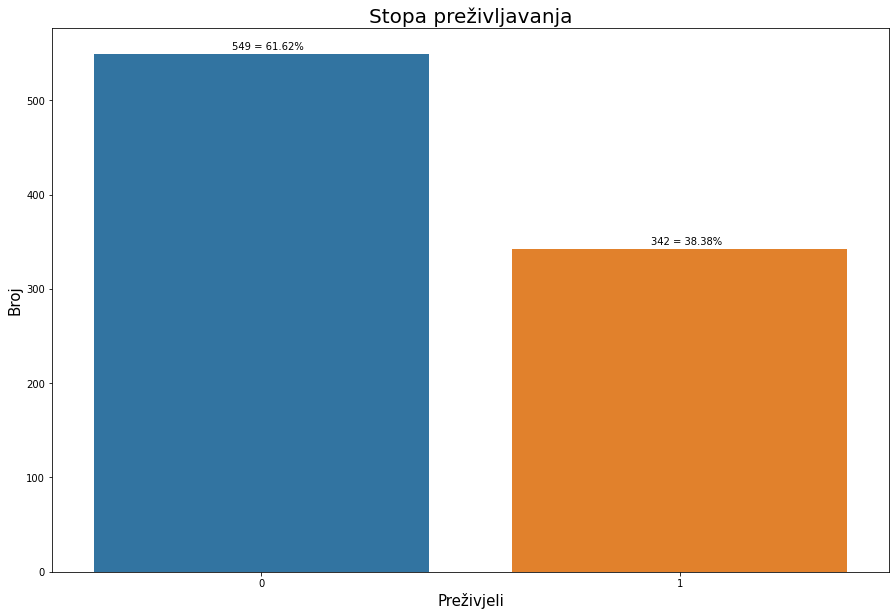

In [14]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', data = podaci_train)
plt.title('Stopa preživljavanja', fontsize = 20)
plt.xlabel('Preživjeli', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(podaci_train['Survived'])) * 100), (p.get_x() + 0.33, p.get_height() + 5))
plt.show()

Na temelju podataka iz stupca Preživjeli vidimo da su 342 (38.38%) putnika uspjela preživjeti.

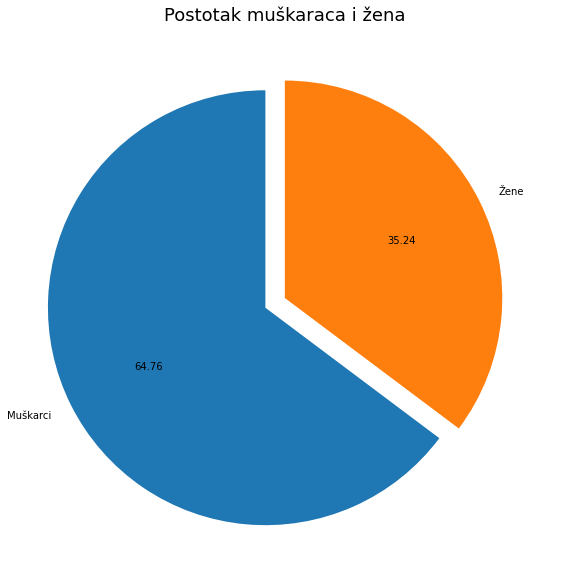

In [15]:
plt.figure(figsize = (15, 10))
plt.pie([(podaci_train.Sex == 'male').sum(), (podaci_train.Sex == 'female').sum()], labels = ["Muškarci", "Žene"], autopct = "%.2f", startangle = 90, explode = (0.1, 0.0))
plt.title('Postotak muškaraca i žena', fontsize = 18)
plt.show()

Vidimo da su većina putnika na Titaniku bili muškarci, njih 64.76%.<br>
Sada nas zanima postotak preživjelih iz skupine muškaraca, odnosno žena.

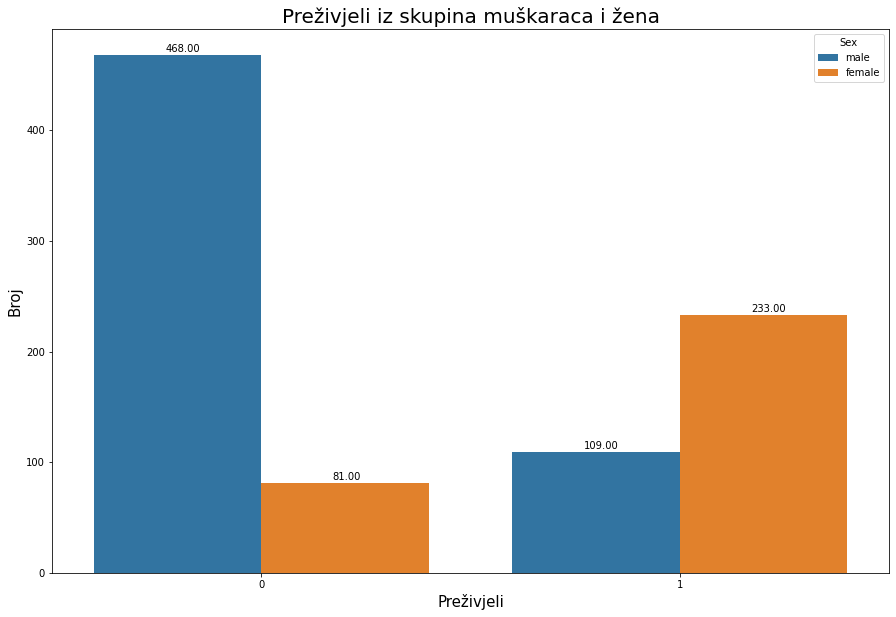

In [16]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = podaci_train)
plt.title('Preživjeli iz skupina muškaraca i žena', fontsize = 20)
plt.xlabel('Preživjeli', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

Zaključujemo da većina muškaraca nije preživjela, dok većina žena je preživjela.

Nadalje, zanima nas stopa preživljavanja po razredima (`Pclass`).

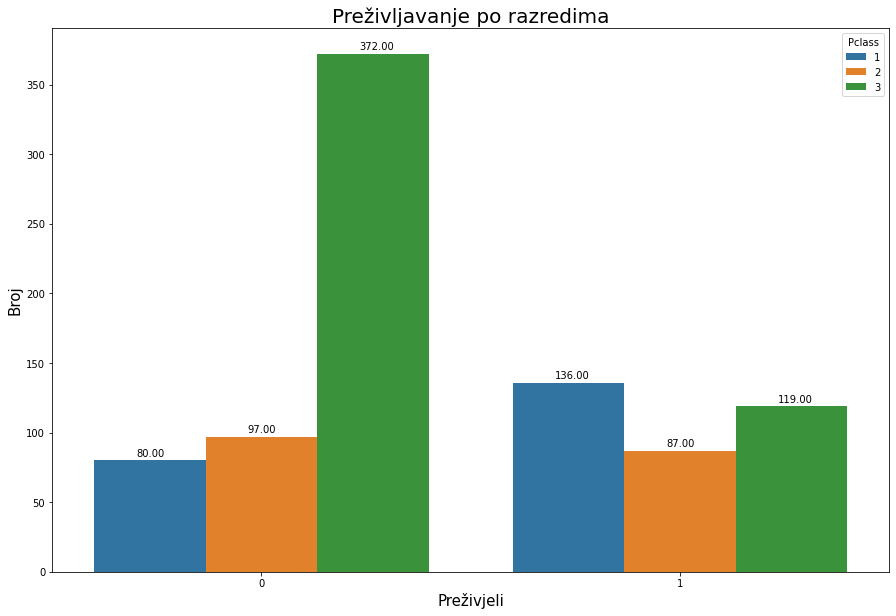

In [17]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = podaci_train)
plt.title('Preživljavanje po razredima', fontsize = 20)
plt.xlabel('Preživjeli', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 3))
plt.show()

Primjećujemo kako razred u kojemu su putnici putovali utječe na krajnji ishod - jesu li preživjeli ili ne.<br>
Vidimo kako putnici 3. razreda imaju znatno višu stopu smrtnosti od ostala dva razreda.<br>
Također, vidimo da su putnici 1. razreda imali više preživjelih nego umrlih.

Dalje nas zanima raspršenost dobi putnika na Titaniku.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


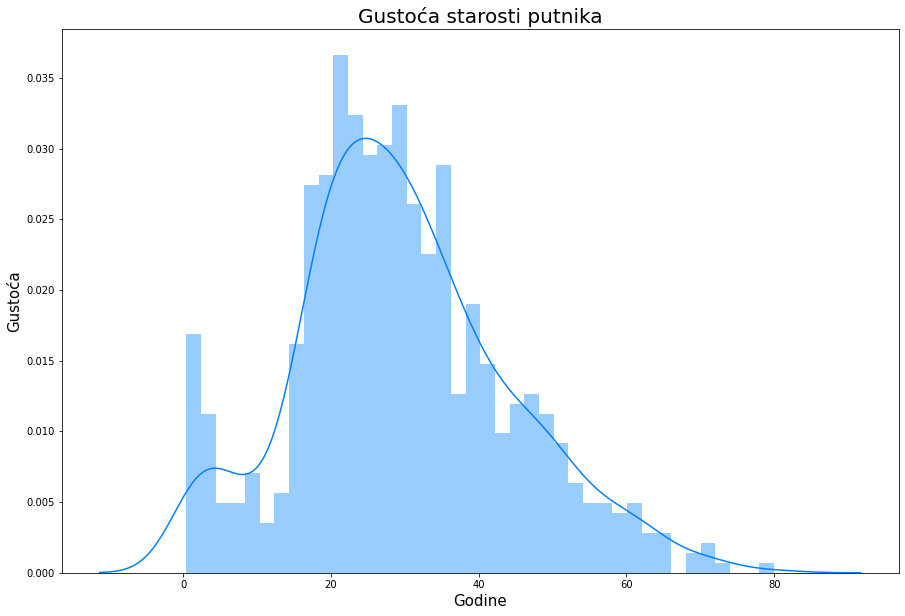

In [18]:
plt.figure(figsize = (15, 10))
sns.distplot(podaci_train['Age'].dropna(), color = (0, 0.5, 1), bins = 40, kde = True)
plt.title('Gustoća starosti putnika', fontsize = 20)
plt.xlabel('Godine', fontsize = 15)
plt.ylabel('Gustoća', fontsize = 15)
plt.show()

Zaključujemo kako je većina putnika bila u dobi od 20 do 40 godina.

Dalje nas zanima koliko je putnika putovalo samo.

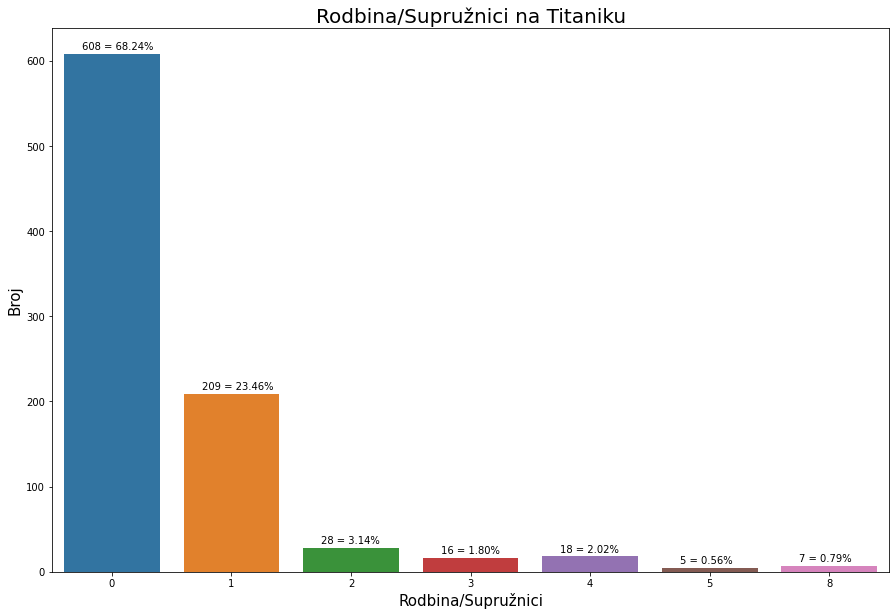

In [19]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'SibSp', data = podaci_train)
plt.title('Rodbina/Supružnici na Titaniku', fontsize = 20)
plt.xlabel('Rodbina/Supružnici', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(podaci_train['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

Iz grafikona vidimo kako je većina putnika putovala sama, odnosno bez rodbine ili supružnika.

Slično, sada gledamo koliko je putnika putovalo sa djecom/roditeljima.

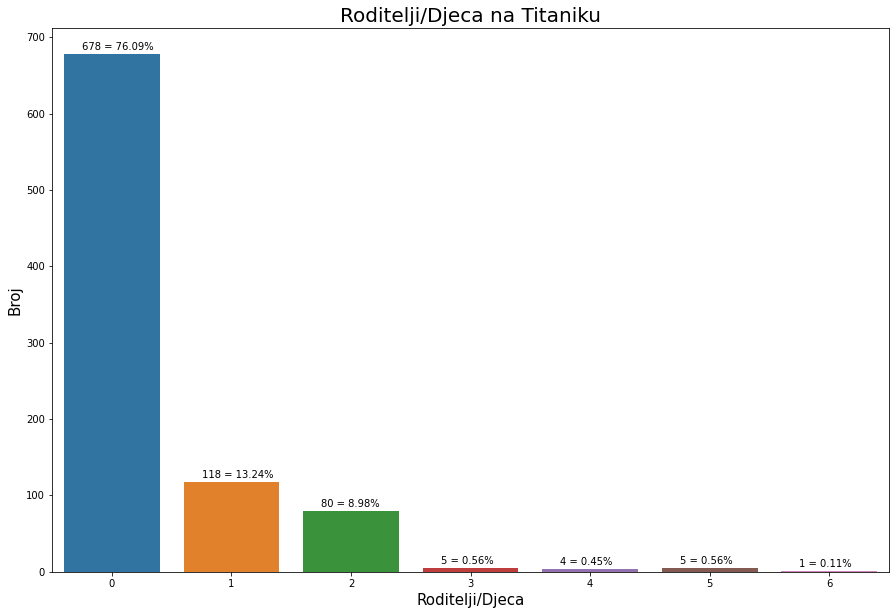

In [20]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Parch', data = podaci_train)
plt.title('Roditelji/Djeca na Titaniku', fontsize = 20)
plt.xlabel('Roditelji/Djeca', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(podaci_train['Parch'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

Također, kao i kod grafikona sa Rodbinom/Supružnicima iz ovog grafikona Roditelji/Djeca ponovno zaključujemo kako je većina putnika putovala sama.

Za kraj ćemo pogledati vrijednosti medijana za godine putnika po razredima kako bi mogli popuniti podatke koji nedostaju.

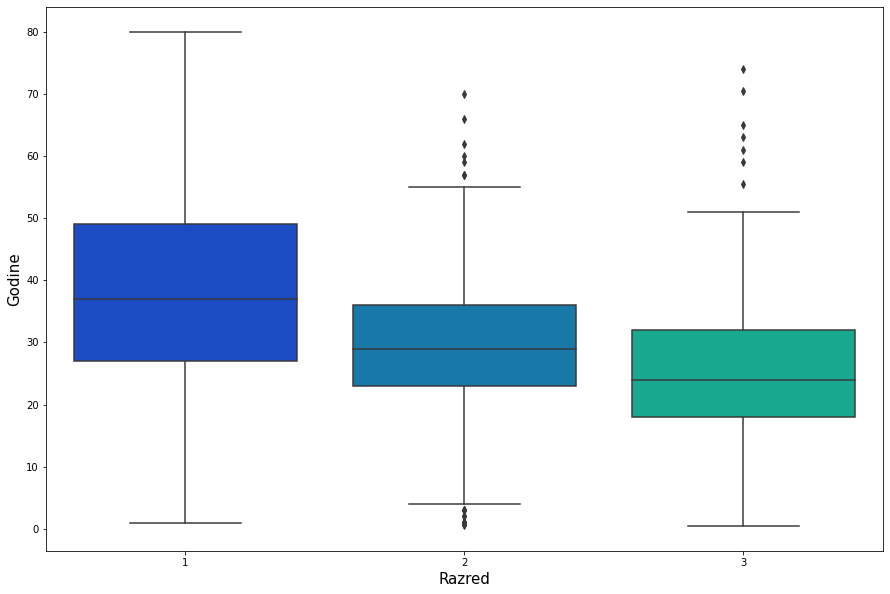

In [21]:
plt.figure(figsize = (15, 10))
bp = sns.boxplot(x = 'Pclass', y = 'Age', data = podaci_train, palette = 'winter')
plt.xlabel('Razred', fontsize = 15)
plt.ylabel('Godine', fontsize = 15)
plt.show()

Zaključujemo:
- Median godina putnika prvog razreda je najviši.
- Median godina putnika trećeg razreda je najniži.

Sada popunjavamo vrijednosti koje nedostaju u stupcu `Age` na temelju mediana dobi tog razreda (`Pclass`).

In [22]:
def transform_columns(column):
    Age = column[0]
    Pclass = column[1]
    
    if(pd.isna(Age)):
       if(Pclass == 1):
            return 38
       elif(Pclass == 2):
            return 29   
       else:
            return 23  
    else:
       return Age

podaci_train['Age'] = podaci_train[['Age', 'Pclass']].apply(transform_columns, axis = 1)
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Inženjering značajki

Sada stvaramo novu značajku `IsAlone` koja nam govori je li putnik putovao sam ili sa obitelji.

In [23]:
podaci_train['IsAlone'] = podaci_train['SibSp'] + podaci_train['Parch']
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


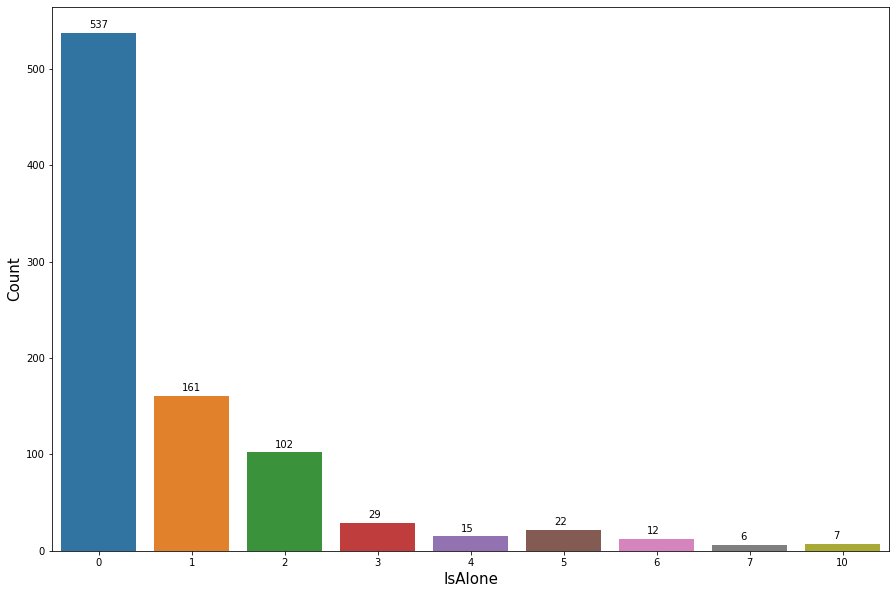

In [24]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'IsAlone', data = podaci_train)
plt.xlabel('IsAlone', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 5))
plt.show()

Kako je već bilo rečeno, ovo potvrđuje da je većina putnika putovala sama.

Dalje nam je cilj podijeliti značajku IsAlone na one koji su putovali sami i na one koji nisu.

In [25]:
def convert_IsAlone(podaci):
    
    bins = [None] * len(podaci)

    for i in range(len(podaci)):
        if(podaci.IsAlone[i] == 0):
            bins[i] = 1
        else:
            bins[i] = 0

    podaci['IsAlone'] = bins
    
convert_IsAlone(podaci_train)
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Stvorili smo dvije grupe za značajku `IsAlone`.<br>
- Grupa `1` predstavlja one putnike koji putuju sami.<br>
- Grupa `0` predstavlja one putnike koji neputuju sami.

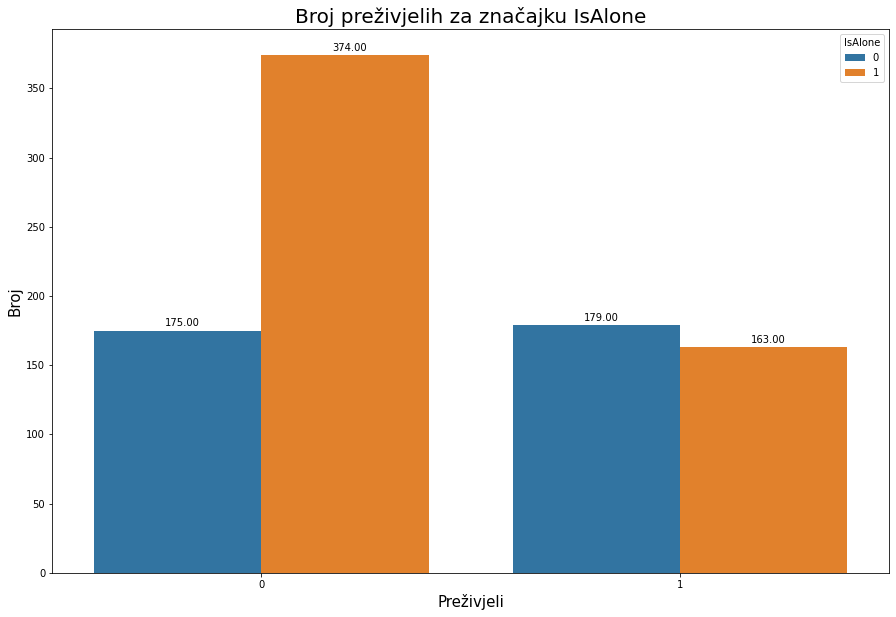

In [26]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'IsAlone', data = podaci_train)
plt.title('Broj preživjelih za značajku IsAlone', fontsize = 20)
plt.xlabel('Preživjeli', fontsize = 15)
plt.ylabel('Broj', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

Iz grafa vidimo kako je većina onih koji su putovali sami umrla, dok je podjednak omjer preživjelih i umrlih kod putnika koji su putovali sa obitelji.

Kako smo stvorili novu značajku `IsAlone` tako možemo izbaciti značajke `SibSp`i `Parch` iz podataka.

In [27]:
podaci_train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [28]:
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,1


In [29]:
def convert_Sex(podaci):
    
    bins = [None] * len(podaci)

    for i in range(len(podaci)):
        if(podaci.Sex[i] == 'male'):
            bins[i] = 1    #muško
        else:
            bins[i] = 0    #žensko

    podaci['Sex'] = bins
    
convert_Sex(podaci_train)
podaci_train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23.0,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,111369,30.0000,C148,C,1


Također, izbacujemo i druge značajke koje ne pridonose predviđanju.

In [30]:
podaci_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
podaci_train

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,0
4,0,3,1,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1
887,1,1,0,19.0,30.0000,1
888,0,3,0,23.0,23.4500,0
889,1,1,1,26.0,30.0000,1


Za kraj ćemo još provjeriti jesu li nam svi podaci popunjeni.

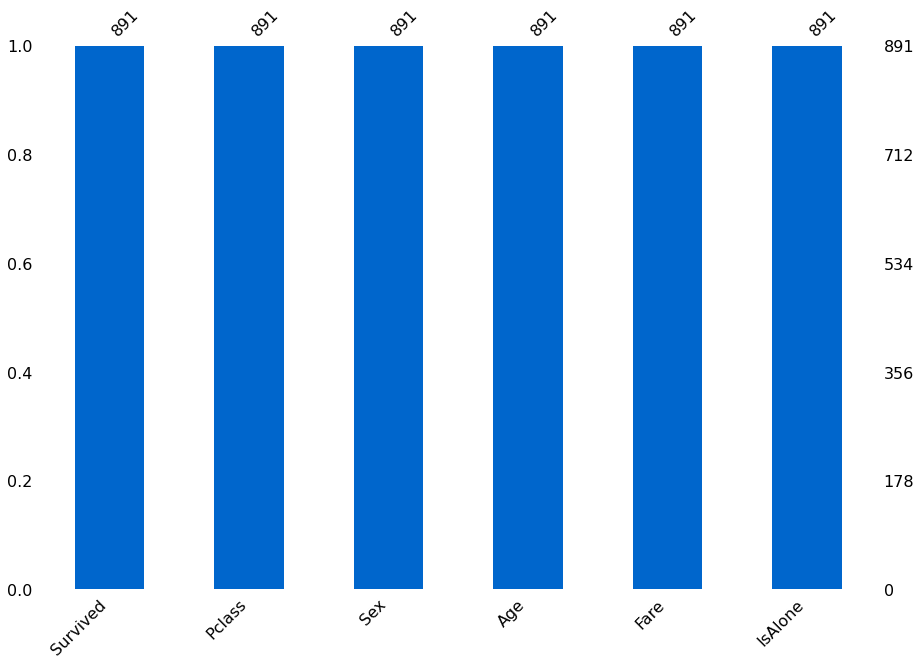

In [31]:
msno.bar(podaci_train, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

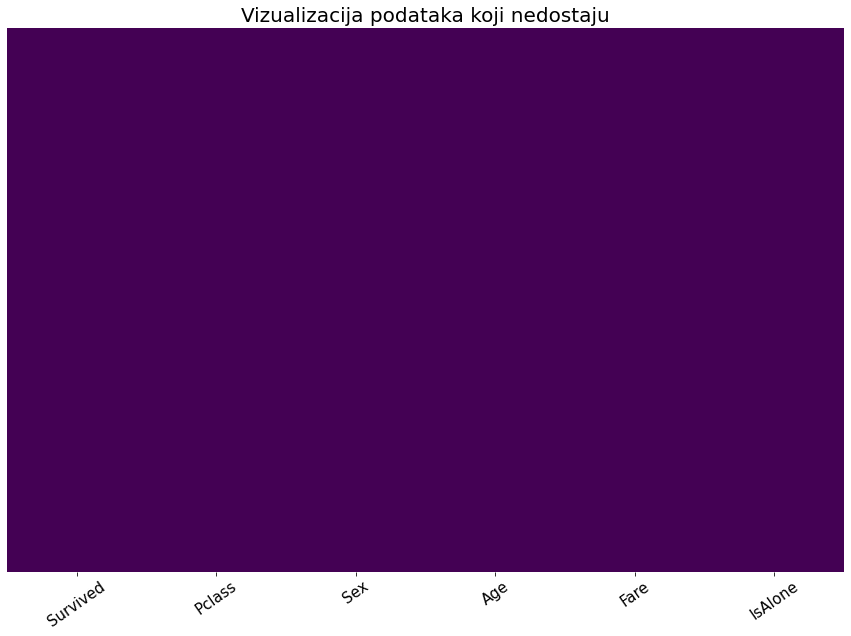

In [32]:
plt.figure(figsize = (15, 10))
sns.heatmap(podaci_train.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Vizualizacija podataka koji nedostaju", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

Skup podataka više ne sadrži vrijednosti koje nedostaju. Sada možemo kodirati i skalirati podatke kako bismo počeli trenirati naše ML modele.

# Korelacija

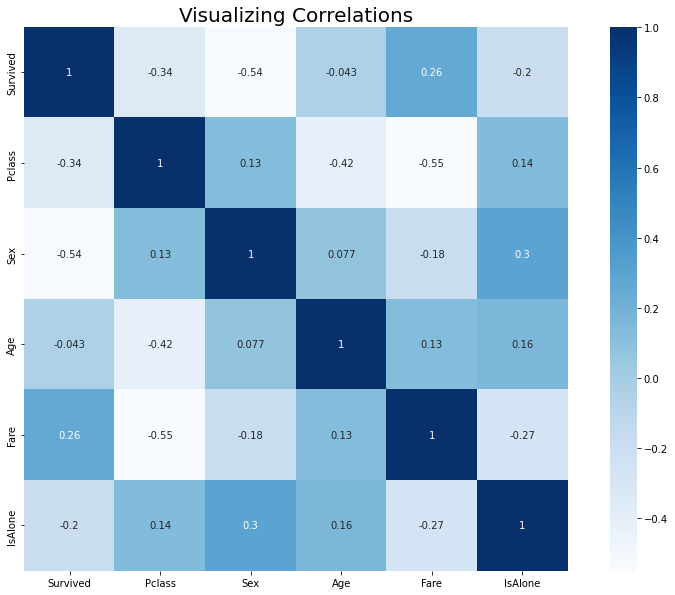

In [33]:
plt.figure(figsize = (15, 10))
sns.heatmap(podaci_train.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

# Skaliranje podataka

StandardScaler standardizira značajku oduzimanjem srednje vrijednosti, a zatim je skalira na jediničnu varijancu.
<div style="width:100%;text-align: center;"> <img align = left src="https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF" style="height:150px"></div>

In [34]:
scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
podaci_train[numeric_features] = scaler.fit_transform(podaci_train[numeric_features])
podaci_train

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,-0.521504,-0.502445,0
1,1,1,0,0.679523,0.786845,0
2,1,3,0,-0.221247,-0.488854,1
3,1,1,0,0.454331,0.420730,0
4,0,3,1,0.454331,-0.486337,1
...,...,...,...,...,...,...
886,0,2,1,-0.146183,-0.386671,1
887,1,1,0,-0.746697,-0.044381,1
888,0,3,0,-0.446440,-0.176263,0
889,1,1,1,-0.221247,-0.044381,1


# Razdvajanje podataka na train i test

In [35]:
X = podaci_train.iloc[:, 1:]
y = podaci_train['Survived']
print(X, "\n\n\n", y)

     Pclass  Sex       Age      Fare  IsAlone
0         3    1 -0.521504 -0.502445        0
1         1    0  0.679523  0.786845        0
2         3    0 -0.221247 -0.488854        1
3         1    0  0.454331  0.420730        0
4         3    1  0.454331 -0.486337        1
..      ...  ...       ...       ...      ...
886       2    1 -0.146183 -0.386671        1
887       1    0 -0.746697 -0.044381        1
888       3    0 -0.446440 -0.176263        0
889       1    1 -0.221247 -0.044381        1
890       3    1  0.229138 -0.492378        1

[891 rows x 5 columns] 


 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Matrica zabune (engl. confusion matrix)
![notacija](https://drive.google.com/uc?id=1omswxCtRkhRH1sVi67SZt6j8gRhCNSyl)

Matrica konfuzije je tablica koja se često koristi za opisivanje izvedbe klasifikacijskog modela slijedeće pojmove povezane s matricom zabune:

- **True Negative**: Predvidjeli smo negativno i to je točno predviđanje.
- **True positive**: Predvidjeli smo pozitivno i to je točno predviđanje.
- **False positive**: Predvidjeli smo pozitivno, ali to je netočno predviđanje.
- **False negative**: Predvidjeli smo negativno, ali je netočno predviđanje.

In [37]:
def visualize_confmat(cm_for_mod):
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_for_mod, annot = True, cmap = 'Blues', annot_kws={'size': 15}, square = True, fmt='g')
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

# Boosting algoritmi

<h2>Decision Tree Classifier</h2> <br>

<div style="width:100%;text-align: center;"> <img align = left src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png" style="height:500px"> </div>

Točnost - Decision Tree Classifier: 80.44692737430168 %





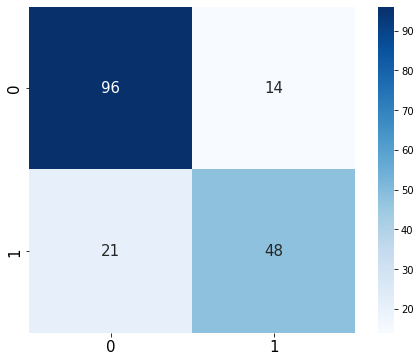

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print("Točnost - Decision Tree Classifier:", acc_dtc * 100, "%")
print("\n\n")
cm_dtc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_dtc)

<h3>Vizualizacija - Decision Tree Classifier</h3>

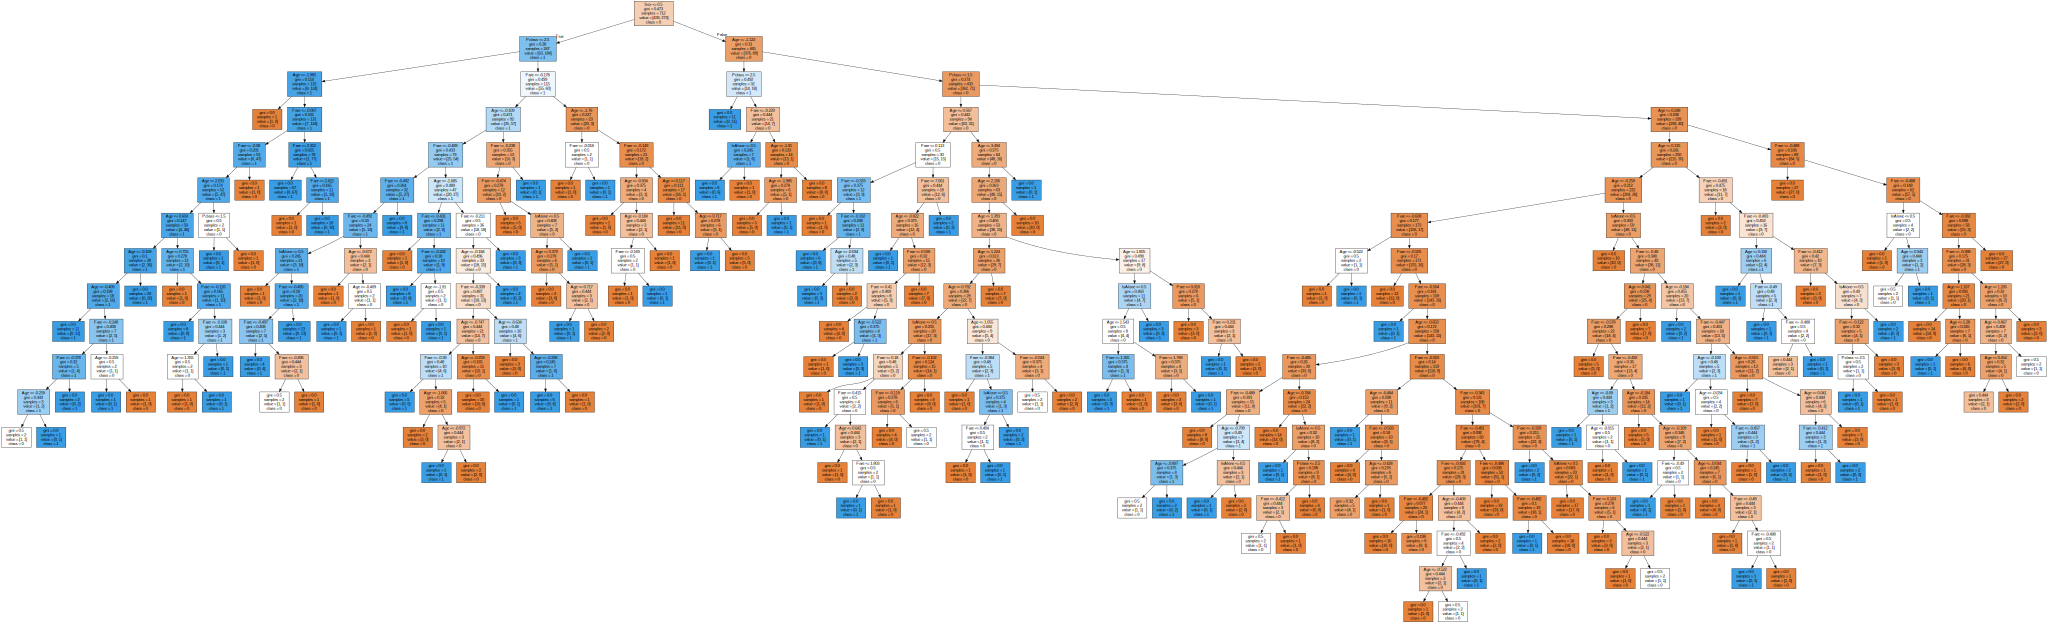

In [39]:
dot_data = tree.export_graphviz(dtc, out_file = None, feature_names = X.columns, class_names = ["0", "1"], filled = True)
graph = graphviz.Source(dot_data, format = "jpg")
display(graph)

<h2>Bagging Classifier</h2>


Točnost - Bagging Classifier: 82.68156424581005 %





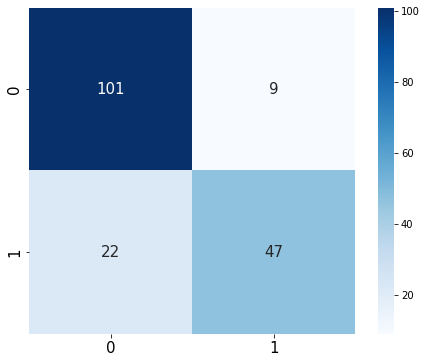

In [40]:
bgc = BaggingClassifier()
bgc.fit(X_train, y_train)
y_pred = bgc.predict(X_test)
acc_bgc = bgc.score(X_test, y_test)
print("Točnost - Bagging Classifier:", acc_bgc * 100, "%")
print("\n\n")
cm_bgc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_bgc)

<h2> Random Forest Classifier</h2>

<div style="width:100%;text-align: center;"> <img align = left src="https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" style="height:400px"> </div>

Točnost - Random Forest Classifier: 84.35754189944134 %





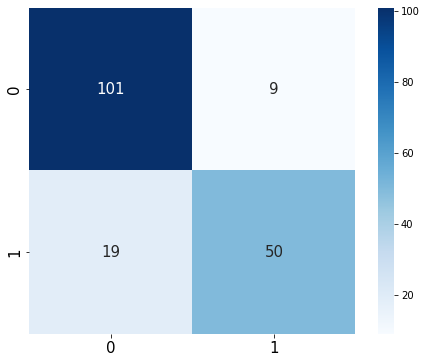

In [41]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = rf.score(X_test, y_test)
print("Točnost - Random Forest Classifier:", acc_rf * 100, "%")
print("\n\n")
cm_rf = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_rf)

# Boosting algoritmi

<h2>Gradient Boosting Classifier</h2>


Točnost - Gradient Boosting Classifier: 82.12290502793296 %





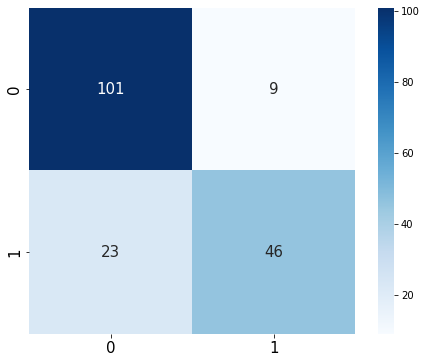

In [42]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print("Točnost - Gradient Boosting Classifier:", acc_gbc * 100, "%")
print("\n\n")
cm_gbc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_gbc)

<h2>AdaBoost Classifier</h2>


Točnost - AdaBoost Classifier: 80.44692737430168 %





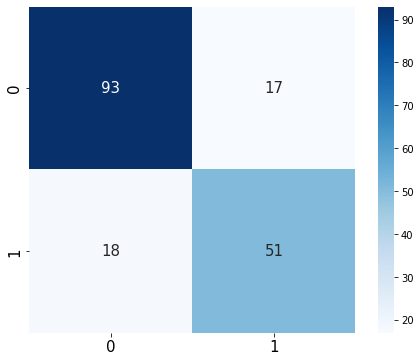

In [43]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
acc = adc.score(X_test, y_test)
acc_adc = adc.score(X_test, y_test)
print("Točnost - AdaBoost Classifier:", acc_adc * 100, "%")
print("\n\n")
cm_adc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_adc)

<h2>XGBoost Classifier</h2>


Točnost - XGBoost Classifier: 83.79888268156425 %





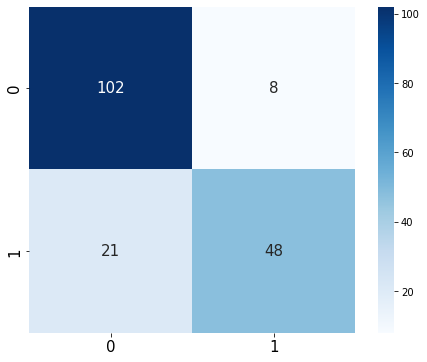

In [44]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print("Točnost - XGBoost Classifier:", acc_xgbc * 100, "%")
print("\n\n")
cm_xgbc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_xgbc)

# Rezultati

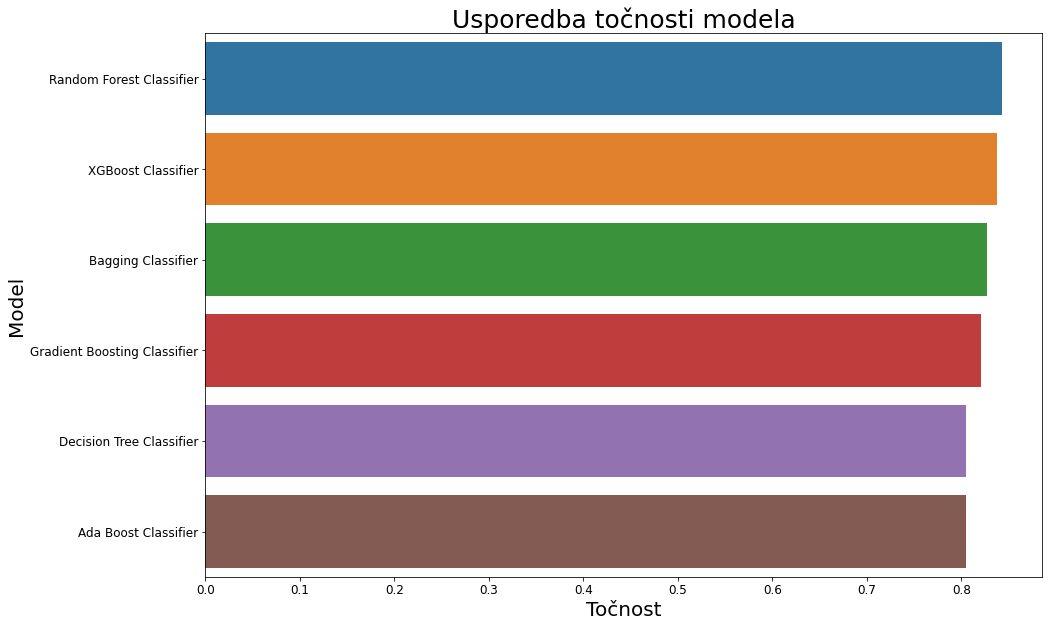

In [45]:
data = {'Decision Tree Classifier': acc_dtc, 'Random Forest Classifier': acc_rf,
        'Ada Boost Classifier': acc_adc,
        'Bagging Classifier': acc_bgc, 'Gradient Boosting Classifier': acc_gbc,
        'XGBoost Classifier': acc_xgbc}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Točnost", size = 20)
plt.xticks(size = 12)
plt.ylabel("Model", size = 20)
plt.yticks(size = 12)
plt.title("Usporedba točnosti modela", size = 25)
plt.show()

# Stvaranje rješenja

In [46]:
from sklearn.preprocessing import LabelEncoder

test_podaci = pd.read_csv('/content/drive/MyDrive/Umjetna inteligencija/Projekt/test.csv')
test_podaci['Age'] = test_podaci[['Age', 'Pclass']].apply(transform_columns, axis = 1)
test_podaci = test_podaci.drop(columns = ['Cabin'], axis = 1)
test_podaci = test_podaci.fillna(podaci_train['Fare'].mean())
test_podaci['IsAlone'] = test_podaci['SibSp'] + test_podaci['Parch']
convert_IsAlone(test_podaci)
test_podaci.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1, inplace = True)

label_encoder = LabelEncoder()
test_podaci['Sex'] = label_encoder.fit_transform(test_podaci['Sex'])
test_podaci['IsAlone'] = label_encoder.fit_transform(test_podaci['IsAlone'])

X = test_podaci.iloc[:, 0:]
y_pred_rf = rf.predict(X)
final_pred = list(y_pred_rf)
final_sub = pd.read_csv('/content/drive/MyDrive/Umjetna inteligencija/Projekt/test.csv')['PassengerId']
final_sub = pd.DataFrame(final_sub)
final_sub['Survived'] = final_pred
final_sub.to_csv('predvidanje.csv', index = False)
final_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
